In [22]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution, plot_histogram
from qiskit_aer import AerSimulator

In [ ]:
# Define the number of address and data qubits
num_address_qubits = 2  # Address lines (can encode 2^2 = 4 locations)
num_data_qubits = 3      # Data storage (each location has 3 qubits of data)

# Quantum registers
address = QuantumRegister(num_address_qubits, name='addr')  # Address qubits
data = QuantumRegister(num_data_qubits, name='data')        # Data qubits
meas_address = ClassicalRegister(num_address_qubits, name='medida_addr')  # To measure address qubits
meas_data = ClassicalRegister(num_data_qubits, name='medida_data')  # To measure data qubits

In [24]:
# Create the QRAM circuit
qram_circuit = QuantumCircuit(address, data, meas_address, meas_data)

# Define stored data (mapping classical data to quantum states)
# Example: A simple 4-entry memory
stored_data = {
    '00': [1, 0, 1],  # Data for address 00
    '01': [0, 1, 1],  # Data for address 01
    '10': [1, 1, 0],  # Data for address 10
    '11': [1, 1, 1]   # Data for address 11
}


In [25]:
# QRAM Black-Box Encoding
def qram_unitary():
    qram = QuantumCircuit(num_address_qubits + num_data_qubits, name='   QRAM   ')
    
    for addr, values in stored_data.items():
        addr_bits = [int(bit) for bit in addr]
        control_qubits = []
        
        # Apply X gates to match address (preparing control state)
        for i, bit in enumerate(addr_bits):
            if bit == 0:
                qram.x(i)
                control_qubits.append(i)
        
        # Apply multi-controlled Toffoli gates for data storage
        for j, value in enumerate(values):
            if value == 1:
                qram.mcx(list(range(num_address_qubits)), num_address_qubits + j)
        
        # Reset the control qubits that were flipped
        for qubit in control_qubits:
            qram.x(qubit)
    
    return qram.to_instruction()


In [26]:
# Apply Hadamard gate to address input qubits
qram_circuit.h(range(num_address_qubits))

In [27]:
qram_instruction = qram_unitary()
qram_circuit.append(qram_instruction, address[:] + data[:])

In [28]:
# Measure the data qubits
qram_circuit.barrier()
qram_circuit.measure(address, meas_address)
qram_circuit.measure(data, meas_data)

QRAM Circuit:


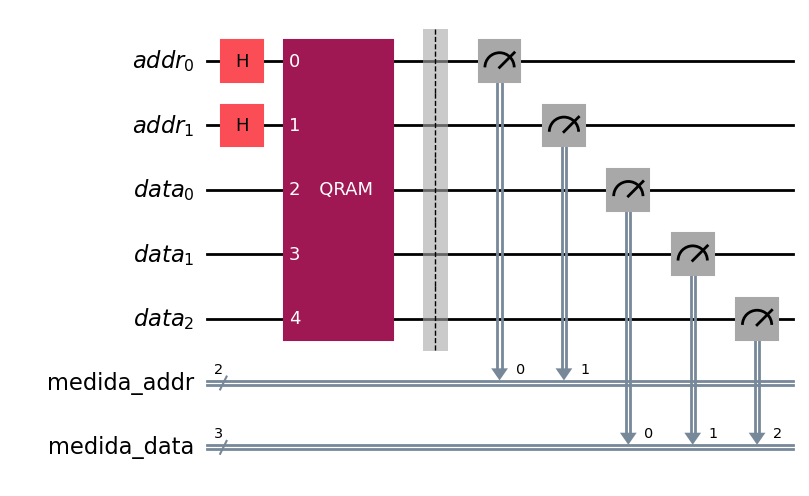

In [29]:
# Display the circuit
print("QRAM Circuit:")
# print(qram_circuit)
qram_circuit.draw('mpl')

In [30]:
# Simulate the QRAM circuit
simulator = AerSimulator()
result = simulator.run(qram_circuit.decompose(reps=1), shots=10000).result()
counts = result.get_counts()

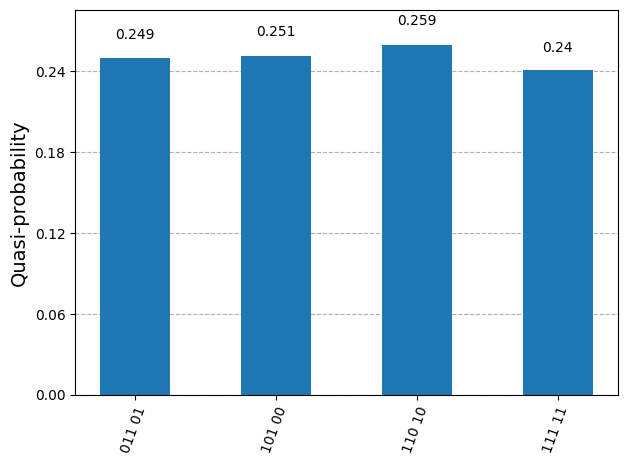

In [31]:
plot_distribution(counts)